In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_complete = pd.read_csv("csvFiles/Main_Scooter(10percent).csv")

In [3]:
data_complete = data_complete.dropna()
data_complete['Zipcode'] = data_complete['Zipcode'].astype(str)
data_complete = data_complete.sort_values(by=['Month', 'Day'])
data_complete.reset_index(inplace = True, drop = True)

In [4]:
what_time = data_complete['Hour'] == 6

data_morning = data_complete[what_time]

p_type =  data_complete['Poverty Type'] == 'High'
    
data_sub = data_morning[p_type]


data_morning = data_morning.dropna()
data_morning = data_morning.sort_values(by=['Month', 'Day'])
data_morning.reset_index(inplace = True, drop = True)


C:\Users\david\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [5]:
data_morning_bar = data_morning[['CompanyName', 'Poverty Type', 'NumberAvailable']]

In [17]:
data_morning_bar.head()

grouped = data_morning_bar.groupby(['CompanyName', 'Poverty Type'])

grouped.head()

,CompanyName,Poverty Type,NumberAvailable
0,Lime,Low,1
1,Lime,High,2
2,Lime,High,4
3,Lime,Low,1
4,Lime,Downtown,1
5,Lime,Downtown,4
6,Lime,Low,4
7,Lime,Downtown,3
8,Lime,Downtown,1
9,Lime,Downtown,1


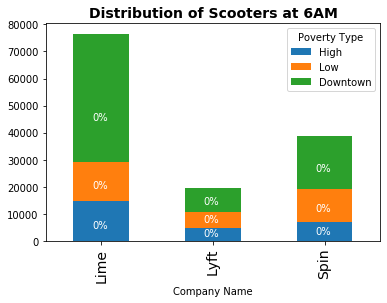

In [25]:


df2 = data_morning_bar.groupby(['CompanyName', 'Poverty Type'])['NumberAvailable'].sum().unstack('Poverty Type').fillna(0)

ax = df2[['High','Low', 'Downtown']].plot(kind='bar', stacked=True)
# Change this line to plot percentages instead of absolute values
#ax = (df2.div(df2.sum(1), axis=0)).plot(kind='bar', stacked = True, figsize=(10,4),width = 0.8,edgecolor=None)
#plt.legend(labels=df2.columns,fontsize= 14)
#plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)

perc_list = []

for i in ax.patches:
    
    perc_list.append(i.get_height())

    
perc_totals = sum(perc_list)


for i in ax.patches:
    
        ax.text(i.get_x()+0.33*i.get_width(), i.get_y() + 0.33* i.get_height(), str(int(round(i.get_height()/perc_totals, 2)))+'%', fontsize=10, color='white')
   
        #ax.annotate(f"{perc_list[i]}%", (i.get_x()+0.33*i.get_width(), i.get_y() + 0.33*i.get_height()), color = 'white')


plt.title("Distribution of Scooters at 6AM", fontsize=14, fontweight="bold")
plt.xlabel("Company Name")
plt.savefig("Images/6AM_Bar(10percent).png")
plt.show()